This data contains 961 instances of masses detected in mammograms, and contains the following attributes:

BI-RADS assessment: 1 to 5 (ordinal)
Age: patient's age in years (integer)
Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
Severity: benign=0 or malignant=1 (binominal)
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [13]:
data_path = 'mammographic+mass'
col_names = ['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity']
df_data = pd.read_csv(os.path.join(data_path, 'mammographic_masses.data'), names=col_names, na_values='?')
df_data.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [14]:
# df_data = df_data.replace('?',np.nan)
# df_data.head()

In [15]:
df_data.shape

(961, 6)

In [16]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   959 non-null    float64
 1   Age       956 non-null    float64
 2   Shape     930 non-null    float64
 3   Margin    913 non-null    float64
 4   Density   885 non-null    float64
 5   Severity  961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB


In [17]:
df_data.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [21]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [19]:
X = df_data[['Age', 'Shape', 'Margin', 'Density']]
y = df_data['Severity']

In [20]:
print(X.shape, y.shape)

(961, 4) (961,)


In [22]:
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

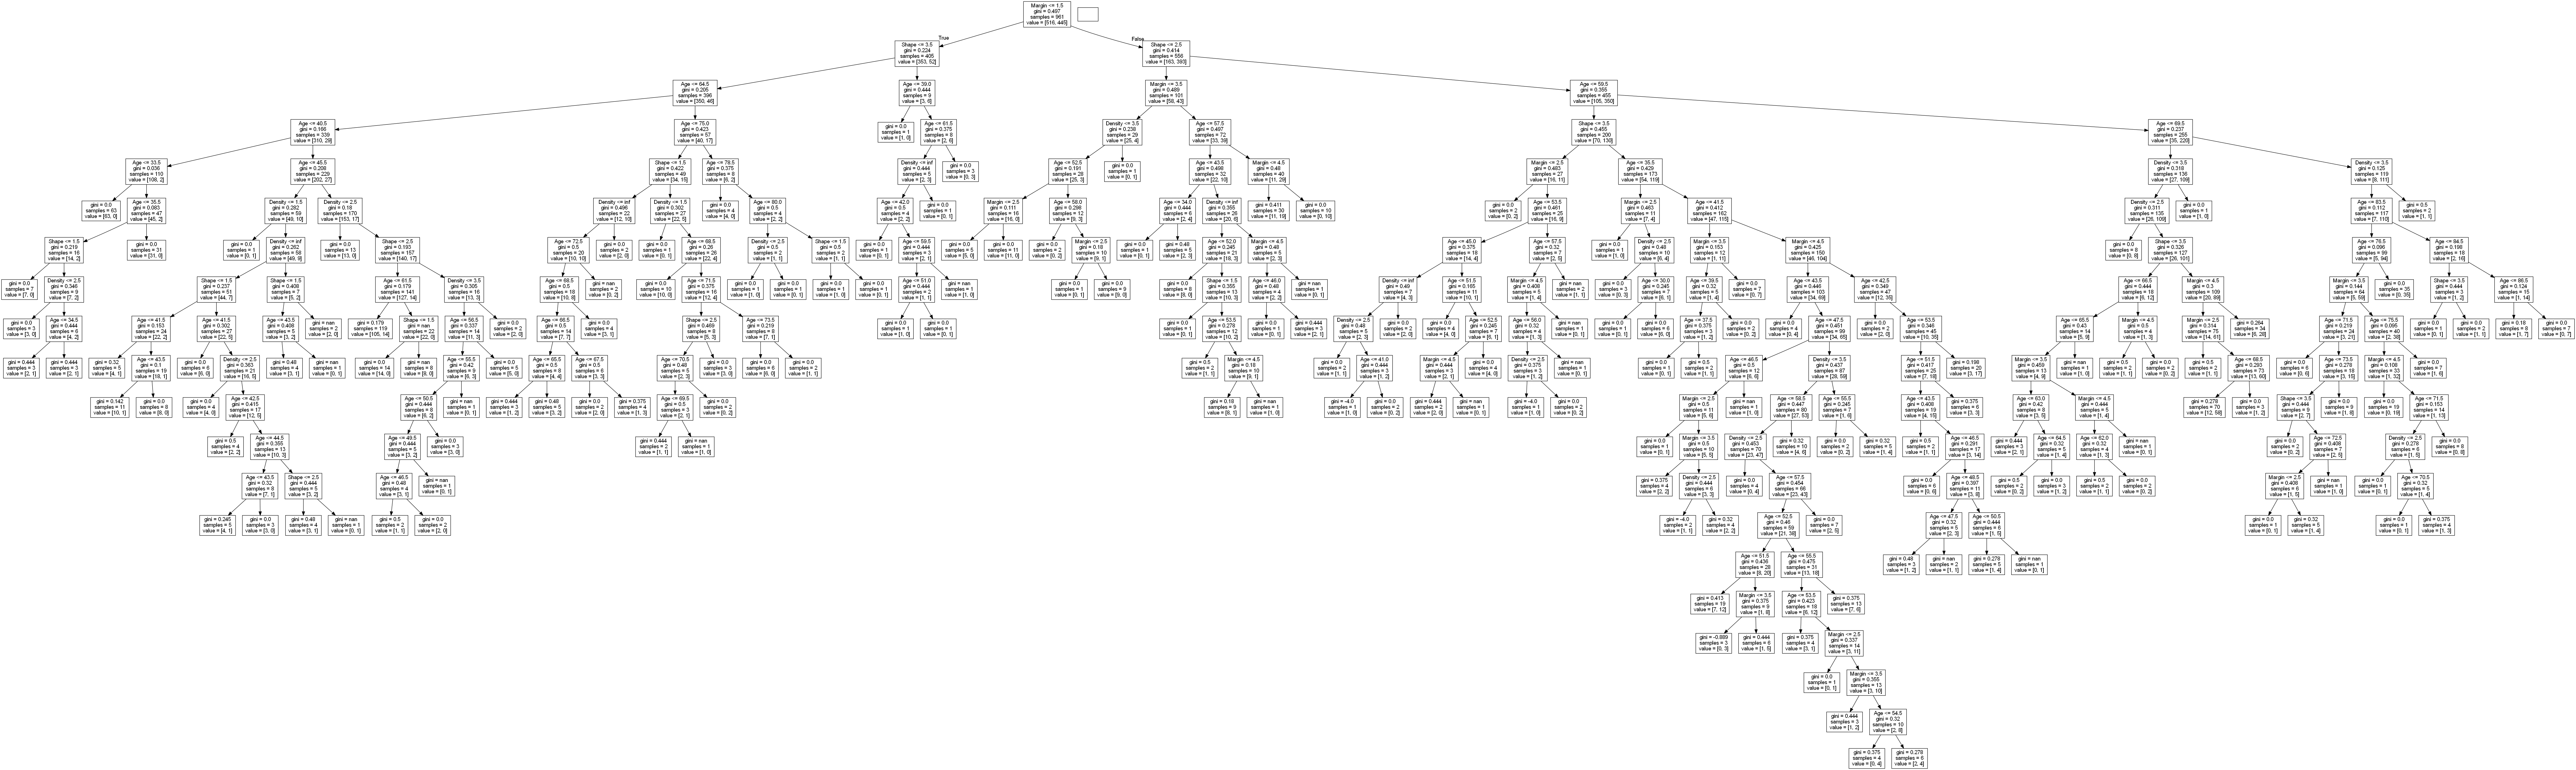

In [24]:
from IPython.display import Image  
from six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=['Age', 'Shape', 'Margin', 'Density'])  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [26]:
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=10)
print(scores)
print(scores.mean())

[0.7628866  0.78125    0.8125     0.80208333 0.78125    0.83333333
 0.72916667 0.79166667 0.78125    0.73958333]
0.7814969931271478
